In [2]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package

from qca import QCA, defaults
from states import make_state
import measures as ms
from figures import draw_MI, network_animation, grid_animation

from copy import copy
from os import makedirs

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import curve_fit
from importlib import reload

%matplotlib inline

In [3]:
# Location to save/load data
der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"

In [4]:
# reload if changing source code
def reimport():
    import qca
    import networkviz
    import core
    import matrix
    reload(qca)
    reload(networkviz)
    reload(ms)
    reload(core)
    reload(matrix)
    from qca import QCA
    from figures import draw_MI, network_animation, grid_animation
reimport()

In [5]:
params = copy(defaults)

params["T"] = 100.0
params["V"] = "h"
params["totalistic"] = True

evos = [{"tris": "13_24"}, {"rods": "1234"}]
BCs = ["1-00", "1-0"]
Rs = [4, 2]

Ls = [8, 9, 12, 16]
Lxs = [2, 3, 3, 4]
ICs = ["f1-2-5-6", "f1-3-5-7", "f1-3-8-10", "f1-4-11-14"]

Es = [0.0, 0.02]
N = 1000

# Rule $\sqrt{F_{10}}$ -- Rotating C$\sqrt{H}$ around a cross

## One excitation

In [17]:
rodQs = []
rod_depolQs = []
for L, Lx in zip(Ls, Lxs):
    p = copy(params)
    p["L"] = L
    p["Lx"] = Lx
    p["R"] = 2
    p["BC"] = "1-0"
    p.update({"rods":"1234"})
    p["IC"] = "f0"
    p_depol = copy(p)
    p_depol["E"] = Es[1]
    p_depol["N"] = N
    Q = QCA(p)
    Q_depol = QCA(p_depol)
    rodQs.append(Q)
    rod_depolQs.append(Q_depol)

In [23]:
ani = grid_animation(rodQs+rod_depolQs, "exp_Z", nrows=2, label="L")
HTML(ani.to_html5_video())

In [24]:
ani = grid_animation(rodQs+rod_depolQs, "s_2", nrows=2, label="L")
HTML(ani.to_html5_video())

In [74]:
ani = network_animation(rodQs, layout="grid", label="L")
HTML(ani.to_html5_video())

In [75]:
ani = network_animation(rod_depolQs, layout="grid", label="L")
HTML(ani.to_html5_video())

In [127]:
import figures
reload(figures)
from figures import network_measures_plot

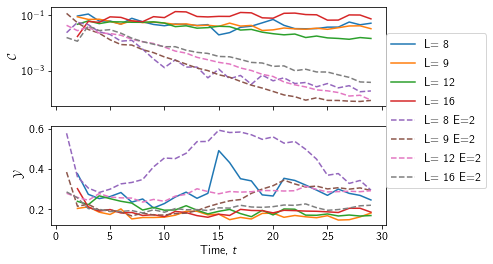

In [130]:
fig, axs = network_measures_plot(rodQs, label="L", logC=True, tmin=2, tmax=30)
fig, axs = network_measures_plot(rod_depolQs, axs=axs, label="L", logC=True, tmin=1, tmax=30, sublabel="E=2", ls="--")

In [9]:
from scipy.optimize import curve_fit
def exponential(t, t0, A, B):
    return A* np.exp(-t/t0) + B

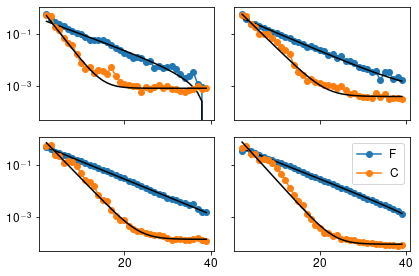

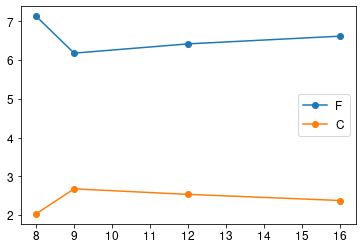

In [20]:
tmax=40
popts_C = []
popts_F = []
Ls = []
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
for i, (Q, Qdepol) in enumerate(zip(rodQs, rod_depolQs)):
    j, k = np.unravel_index(i, (2, 2))
    ax = axs[j, k]
    C = Q.C(2)[2:tmax] 
    Cdepol = Qdepol.C(2)[2:tmax]
    F = Qdepol.F(save=True)[2:tmax]
    Cdiff = 1 - (C - Cdepol) / C
    Cdiff = Cdiff
    ts = Q.ts[2:tmax]
    popt_F, pcov_F = curve_fit(exponential, ts, F, p0=[1, 1, 2.0**(-Q.L)], sigma=F)
    popt_C, pcov_C = curve_fit(exponential, ts, Cdiff, p0=[1, 1, 2.0**(-Q.L)], sigma=Cdiff)
    ax.plot(ts, F, marker="o", label="F")
    ax.plot(ts, exponential(ts, *popt_F), c="k")
    ax.plot(ts, Cdiff, marker="o", label="C")
    ax.plot(ts, exponential(ts, *popt_C), c="k")
    popts_F.append(popt_F)
    popts_C.append(popt_C)
    Ls.append(Q.L)
    ax.set_yscale("log")
    #ax.set_xscale("log")
ax.legend()
plt.tight_layout()
plt.show()
popts_C = np.array(popts_C)
popts_F = np.array(popts_F)

plt.plot(Ls, popts_F[:,0], label="F", marker="o")
plt.plot(Ls, popts_C[:,0], label="C", marker="o")
plt.legend()

 ## Four Excitations

In [15]:
rodQs = []
rod_depolQs = []
for L, Lx, IC in zip(Ls, Lxs, ICs):
    p = copy(params)
    p["L"] = L
    p["Lx"] = Lx
    p["R"] = 2
    p["BC"] = "1-0"
    p["IC"] = IC
    p.update({"rods":"1234"})
    p_depol = copy(p)
    p_depol["E"] = Es[1]
    p_depol["N"] = N
    Q = QCA(p)
    Q_depol = QCA(p_depol)
    rodQs.append(Q)
    rod_depolQs.append(Q_depol)

In [102]:
ani = grid_animation(rodQs+rod_depolQs, "exp_Z", nrows=2, label="L")
HTML(ani.to_html5_video())

In [102]:
ani = grid_animation(rodQs+rod_depolQs, "s_2", nrows=2, label="L")
HTML(ani.to_html5_video())

In [103]:
ani = network_animation(rodQs, layout="grid", label="L")
HTML(ani.to_html5_video())

In [104]:
ani = network_animation(rod_depolQs, layout="grid", label="L")
HTML(ani.to_html5_video())

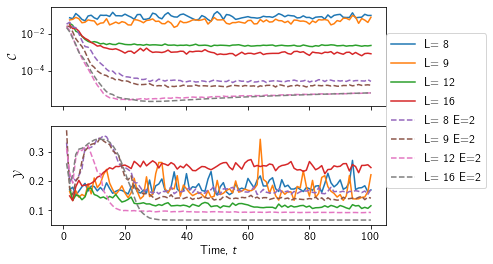

In [113]:
fig, axs = network_measures_plot(rodQs, label="L", logC=True, tmin=2)
fig, axs = network_measures_plot(rod_depolQs, axs=axs, label="L", logC=True, tmin=1, sublabel="E=2", ls="--")

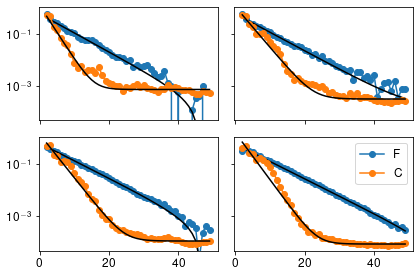

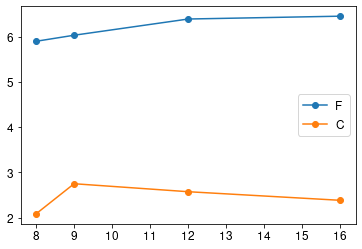

In [21]:
tmax=50
popts_C = []
popts_F = []
Ls = []
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
for i, (Q, Qdepol) in enumerate(zip(rodQs, rod_depolQs)):
    j, k = np.unravel_index(i, (2, 2))
    ax = axs[j, k]
    C = Q.C(2)[2:tmax] 
    Cdepol = Qdepol.C(2)[2:tmax]
    F = Qdepol.F(save=True)[2:tmax]
    Cdiff = 1 - (C - Cdepol) / C
    Cdiff = Cdiff
    ts = Q.ts[2:tmax]
    popt_F, pcov_F = curve_fit(exponential, ts, F, p0=[1, 1, 2.0**(-Q.L)], sigma=F)
    popt_C, pcov_C = curve_fit(exponential, ts, Cdiff, p0=[1, 1, 2.0**(-Q.L)], sigma=Cdiff)
    ax.plot(ts, F, marker="o", label="F")
    ax.plot(ts, exponential(ts, *popt_F), c="k")
    ax.plot(ts, Cdiff, marker="o", label="C")
    ax.plot(ts, exponential(ts, *popt_C), c="k")
    popts_F.append(popt_F)
    popts_C.append(popt_C)
    Ls.append(Q.L)
    ax.set_yscale("log")
    #ax.set_xscale("log")
ax.legend()
plt.tight_layout()
plt.show()
popts_C = np.array(popts_C)
popts_F = np.array(popts_F)

plt.plot(Ls, popts_F[:,0], label="F", marker="o")
plt.plot(Ls, popts_C[:,0], label="C", marker="o")
plt.legend()

# $\sqrt{F_{12}}$ -- blocked triangles

In [25]:
 ## Two Excitations

rodQs = []
rod_depolQs = []
for L, Lx, IC in zip(Ls, Lxs, ICs):
    p = copy(params)
    p["L"] = L
    p["Lx"] = Lx
    p["R"] = 4
    p["BC"] = "1-00"
    p["IC"] = IC
    p.update({"tris":"13_24"})
    p_depol = copy(p)
    p_depol["E"] = Es[1]
    p_depol["N"] = N
    Q = QCA(p)
    Q_depol = QCA(p_depol)
    rodQs.append(Q)
    rod_depolQs.append(Q_depol)

In [106]:
ani = grid_animation(rodQs+rod_depolQs, "exp_Z", nrows=2, label="L")
HTML(ani.to_html5_video())

In [107]:
ani = grid_animation(rodQs+rod_depolQs, "s_2", nrows=2, label="L")
HTML(ani.to_html5_video())

In [108]:
ani = network_animation(rodQs, layout="grid", label="L")
HTML(ani.to_html5_video())

In [109]:
ani = network_animation(rod_depolQs, layout="grid", label="L")
HTML(ani.to_html5_video())

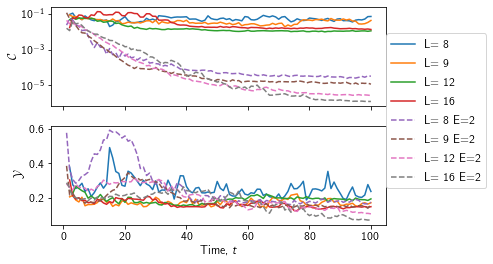

In [115]:
fig, axs = network_measures_plot(rodQs, label="L", logC=True, tmin=2)
fig, axs = network_measures_plot(rod_depolQs, axs=axs, label="L", logC=True, tmin=1, sublabel="E=2", ls="--")

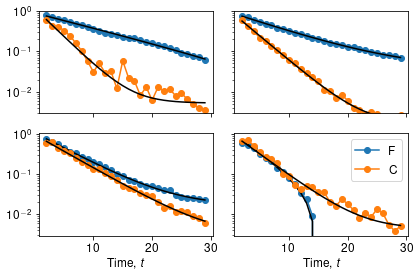

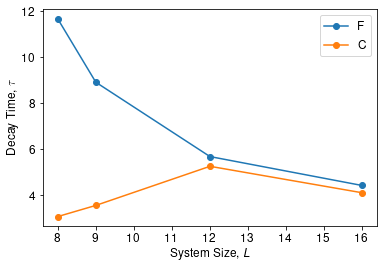

In [29]:
tmax=30
popts_C = []
popts_F = []
Ls = []
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
for i, (Q, Qdepol) in enumerate(zip(rodQs, rod_depolQs)):
    j, k = np.unravel_index(i, (2, 2))
    ax = axs[j, k]
    C = Q.C(2)[2:tmax] 
    Cdepol = Qdepol.C(2)[2:tmax]
    F = Qdepol.F(save=True)[2:tmax]
    Cdiff = 1 - (C - Cdepol) / C
    Cdiff = Cdiff
    ts = Q.ts[2:tmax]
    popt_F, pcov_F = curve_fit(exponential, ts, F, p0=[1, 1, 2.0**(-Q.L)], sigma=F)
    popt_C, pcov_C = curve_fit(exponential, ts, Cdiff, p0=[1, 1, 2.0**(-Q.L)], sigma=Cdiff)
    ax.plot(ts, F, marker="o", label="F")
    ax.plot(ts, exponential(ts, *popt_F), c="k")
    ax.plot(ts, Cdiff, marker="o", label="C")
    ax.plot(ts, exponential(ts, *popt_C), c="k")
    popts_F.append(popt_F)
    popts_C.append(popt_C)
    Ls.append(Q.L)
    ax.set_yscale("log")
    #ax.set_xscale("log")
    if j == 1:
        ax.set_xlabel(r"Time, $t$")
ax.legend()
plt.tight_layout()
plt.show()
popts_C = np.array(popts_C)
popts_F = np.array(popts_F)

fig.savefig(f"figures/sqrtF12_decay-fits.pdf", bbox_inches="tight")

plt.plot(Ls, popts_F[:,0], label="F", marker="o")
plt.plot(Ls, popts_C[:,0], label="C", marker="o")
plt.xlabel(r"System Size, $L$")
plt.ylabel(r"Decay Time, $\tau$")
plt.legend()
plt.savefig(f"figures/sqrtF12_decay-time.pdf", bbox_inches="tight")